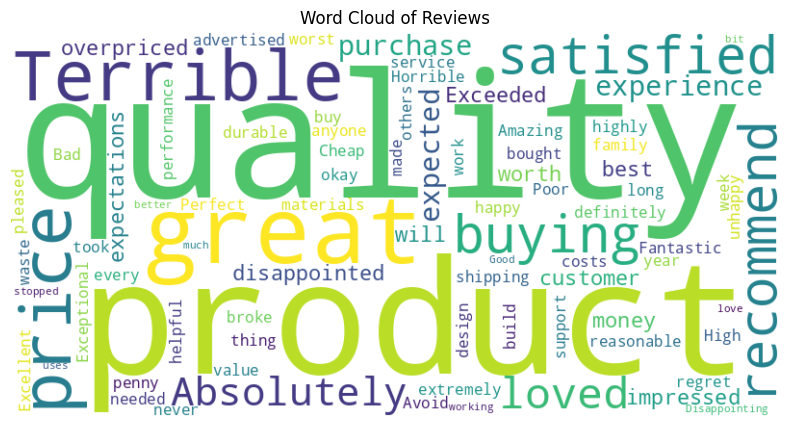

In [11]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'review': [
        'This product is great! I loved it.',
        'Absolutely terrible, do not buy this.',
        'Amazing quality and great price.',
        'The worst experience I have ever had.',
        'I am extremely satisfied with my purchase.',
        'Not what I expected, very disappointed.',
        'Fantastic, will definitely recommend to others.',
        'This is the best thing I have ever bought.',
        'Poor quality and overpriced. Avoid at all costs.',
        'Exceeded my expectations, very happy with it.',
        'Terrible customer service, never buying again.',
        'High quality and reasonable price. Very satisfied.',
        'I regret buying this, such a waste of money.',
        'Great product, but shipping took too long.',
        'Exceptional quality, worth every penny.',
        'Not worth the price, very unhappy with it.',
        'Loved it! Will be buying more for my family.',
        'Horrible experience, product broke in a week.',
        'Very impressed with the performance, highly recommend.',
        'It did not work as advertised, very disappointed.',
        'Best purchase I have made this year!',
        'Cheap materials, not durable at all.',
        'Excellent value for the money, very pleased.',
        'Customer support was helpful, product is just okay.',
        'Perfect for what I needed, very satisfied.',
        'Bad quality, would not recommend to anyone.',
        'Impressed with the build quality and design.',
        'Disappointing, I expected much better.',
        'Absolutely love it, exceeded all my expectations.',
        'Terrible, stopped working after a few uses.',
        'Good product, but a bit overpriced.',
    ]
}

df = pd.DataFrame(data)

# Concatenate all reviews into a single string
text = ' '.join(df['review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()

In [13]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


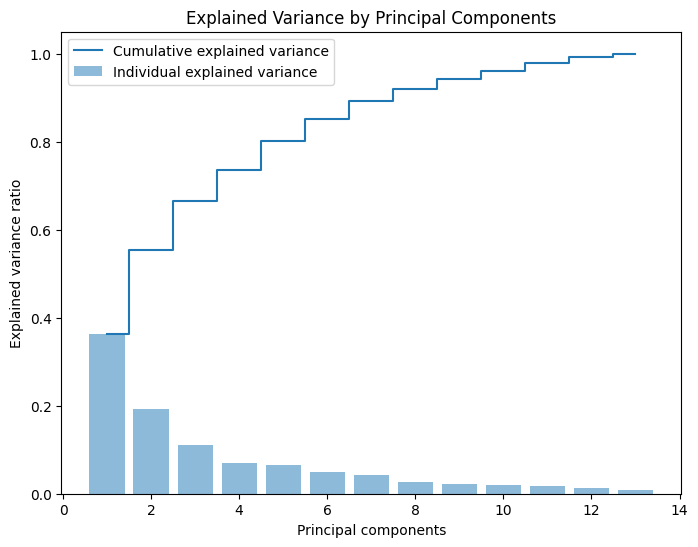

Principal Component 1: 0.3620 (0.3620 cumulative)
Principal Component 2: 0.1921 (0.5541 cumulative)
Principal Component 3: 0.1112 (0.6653 cumulative)
Principal Component 4: 0.0707 (0.7360 cumulative)
Principal Component 5: 0.0656 (0.8016 cumulative)
Principal Component 6: 0.0494 (0.8510 cumulative)
Principal Component 7: 0.0424 (0.8934 cumulative)
Principal Component 8: 0.0268 (0.9202 cumulative)
Principal Component 9: 0.0222 (0.9424 cumulative)
Principal Component 10: 0.0193 (0.9617 cumulative)
Principal Component 11: 0.0174 (0.9791 cumulative)
Principal Component 12: 0.0130 (0.9920 cumulative)
Principal Component 13: 0.0080 (1.0000 cumulative)


In [14]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Standardize the data
features = wine.feature_names
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(x)

# Calculate the explained variance
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid',
         label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()

# Print the explained variance for each component
for i, variance in enumerate(explained_variance, start=1):
    print(f'Principal Component {i}: {variance:.4f} ({np.cumsum(explained_variance)[i-1]:.4f} cumulative)')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:56:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost on Original Features
Accuracy: 0.9629629629629629
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.95      0.95      0.95        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54


XGBoost on PCA Features
Accuracy: 0.9629629629629629
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      1.00      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54



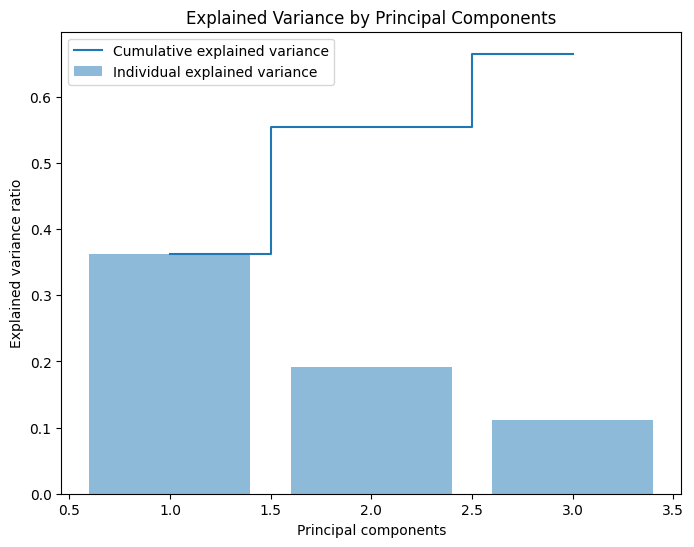

Principal Component 1: 0.3620 (0.3620 cumulative)
Principal Component 2: 0.1921 (0.5541 cumulative)
Principal Component 3: 0.1112 (0.6653 cumulative)


In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import xgboost as xgb

# Load the Wine dataset


# Standardize the data
features = wine.feature_names
x = df.loc[:, features].values
y = df['target'].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca, y, test_size=0.3, random_state=42)

# Train XGBoost model on original features
model_original = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_original.fit(x_train, y_train)
y_pred_original = model_original.predict(x_test)

# Train XGBoost model on PCA-transformed features
model_pca = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_pca.fit(x_pca_train, y_pca_train)
y_pred_pca = model_pca.predict(x_pca_test)

# Evaluate and compare the models
print("XGBoost on Original Features")
print("Accuracy:", accuracy_score(y_test, y_pred_original))
print("Classification Report:")
print(classification_report(y_test, y_pred_original))

print("\nXGBoost on PCA Features")
print("Accuracy:", accuracy_score(y_pca_test, y_pred_pca))
print("Classification Report:")
print(classification_report(y_pca_test, y_pred_pca))

# Plot the explained variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid',
         label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()

# Print the explained variance for each component
for i, variance in enumerate(explained_variance, start=1):
    print(f'Principal Component {i}: {variance:.4f} ({np.cumsum(explained_variance)[i-1]:.4f} cumulative)')